In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("xAPI-Edu-Data.csv")

In [3]:
df.isna().sum().sum()

61

In [4]:
sns.boxplot(df)

c:\Users\sagar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
Q1 = df.raisedhands.quantile(0.25)
Q1

15.0

In [ ]:
Q3 = df.raisedhands.quantile(0.75)
Q3

75.0

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
IQR = Q3-Q1
upper  = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

NameError: name 'Q3' is not defined

In [ ]:
outliers_AV = find_outliers_IQR(df.AnnouncementsView)
outliers_AV

189    5656.0
209     439.0
221    2324.0
386    3321.0
Name: AnnouncementsView, dtype: float64

In [ ]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1


   outliers = find_outliers_IQR(df)
   check = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = df.dropna()

   return check

In [ ]:
outliers_VR = find_outliers_IQR(df.VisITedResources)
outliers_VR

194    5565.0
235    2328.0
404    3333.0
446    1182.0
Name: VisITedResources, dtype: float64

In [ ]:
drop_outliers_IQR(df.VisITedResources)

0      16.0
1      20.0
2       7.0
3      25.0
4      50.0
       ... 
475     4.0
476    77.0
477    74.0
478    17.0
479    14.0
Name: VisITedResources, Length: 476, dtype: float64

In [ ]:
outliers_VR = find_outliers_IQR(df.VisITedResources)
outliers_VR

194    5565.0
235    2328.0
404    3333.0
446    1182.0
Name: VisITedResources, dtype: float64

In [ ]:
x = drop_outliers_IQR(df.AnnouncementsView)
x

0       2.0
1       3.0
2       0.0
3       5.0
4      12.0
       ... 
475     5.0
476    14.0
477     NaN
478    14.0
479    23.0
Name: AnnouncementsView, Length: 476, dtype: float64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum().sum()

0

<AxesSubplot: >

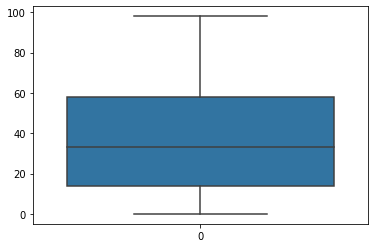

In [ ]:
sns.boxplot(x)

In [5]:
scaler = MinMaxScaler()
data_to_scale = df['AnnouncementsView'].to_numpy().reshape(-1, 1)

# fit the scaler to the data and transform it
df_scaled = scaler.fit_transform(data_to_scale)

# create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=['AnnouncementsView'])

# concatenate the scaled data with the original DataFrame
df_scaled

,AnnouncementsView
0,0.000354
1,0.000530
2,0.000000
3,0.000884
4,0.002122
...,...
475,0.000884
476,0.002475
477,NaN
478,0.002475


In [ ]:
df.to_numpy()

array([['M', 'KW', 'KuwaIT', ..., 'Good', 'Under-7', 'M'],
       ['M', 'KW', 'KuwaIT', ..., 'Good', 'Under-7', 'M'],
       ['M', 'KW', 'KuwaIT', ..., 'Bad', 'Above-7', 'L'],
       ...,
       ['F', 'Jordan', 'Jordan', ..., 'Bad', 'Under-7', 'M'],
       ['F', 'Jordan', 'Jordan', ..., 'Bad', 'Above-7', 'L'],
       ['F', 'Jordan', 'Jordan', ..., 'Bad', 'Above-7', 'L']],
      dtype=object)

In [ ]:
ac = df.AnnouncementsView
df_ac_norm = ((ac - ac.min())/(ac.max() - ac.min()))
df_ac_norm.head()

0    0.000354
1    0.000530
2    0.000000
3    0.000884
4    0.002122
Name: AnnouncementsView, dtype: float64